In [27]:
from ema_workbench import load_results
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [28]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)


from ema_workbench import (Model, MultiprocessingEvaluator, Policy,
                           Scenario, IntegerParameter)
from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ema_workbench import load_results
from ema_workbench.analysis import prim


In [29]:
results = load_results('./SECOND candidate solutions MORDM 1000scenarios.tar.gz')

x, outcomes = results

outcomesdf = pd.DataFrame.from_dict(outcomes)

outcomesdf

[MainProcess/INFO] results loaded succesfully from /Users/josefiendewind/Documents/GitHub/epa1361_open_g29/final assignment/SECOND candidate solutions MORDM 1000scenarios.tar.gz


,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,6.813900e+07,0.0,1.129168e+08,0.028675,1.261015e+08,0.0,2.225849e+07,0.000000,3.337712e+07,0.000000,0.0,0.0
1,6.813900e+07,0.0,1.032626e+08,0.009700,1.261015e+08,0.0,2.225849e+07,0.000000,3.873128e+07,0.004232,0.0,0.0
2,6.813900e+07,0.0,3.119698e+08,0.272643,1.261015e+08,0.0,2.225849e+07,0.000000,3.396254e+07,0.000797,0.0,0.0
3,6.813900e+07,0.0,4.452693e+08,0.311881,1.261015e+08,0.0,2.225849e+07,0.000000,3.337712e+07,0.000000,0.0,0.0
4,6.813900e+07,0.0,9.658126e+07,0.009525,1.261015e+08,0.0,2.225849e+07,0.000000,3.337712e+07,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.062938e+08,0.0,5.335857e+07,0.000000,1.362141e+08,0.0,1.692524e+07,0.000000,2.038955e+08,0.125440,0.0,0.0
4996,1.062938e+08,0.0,5.335857e+07,0.000000,1.362141e+08,0.0,1.727232e+07,0.000199,1.435970e+08,0.069180,0.0,0.0
4997,1.062938e+08,0.0,5.335857e+07,0.000000,1.362141e+08,0.0,1.692524e+07,0.000000,2.846860e+08,0.212311,0.0,0.0
4998,1.062938e+08,0.0,8.528088e+07,0.028440,1.362141e+08,0.0,1.692524e+07,0.000000,2.512551e+08,0.177333,0.0,0.0


In [30]:
y = (outcomesdf['RfR Total Costs'] <= 0) & (outcomesdf['A.1_Expected Number of Deaths'] <= 0) & (outcomesdf['A.2_Expected Number of Deaths'] <= 0.00148) & (outcomesdf['A.3_Expected Number of Deaths'] <= 0.001)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 2112 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1752, coverage: 0.4147727272727273, density: 1.0 restricted_dimensions: 4


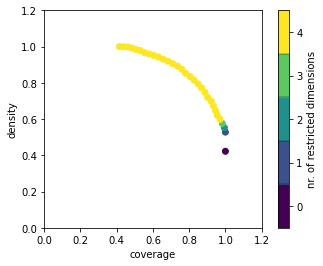

In [31]:
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.8, peel_alpha=0.05)
box = prim_obj.find_box()

box.show_tradeoff()
plt.savefig('PRIM candidate solutions.png')
plt.show()

coverage    0.804924
density     0.834971
id                14
mass          0.4072
mean        0.834971
res_dim            4
Name: 14, dtype: object

             box 14                                          
                min       max                       qp values
3_RfR 0    0.000000  0.500000  [-1.0, 7.2638684877023266e-65]
A.2_pfail  0.337904  0.999312  [1.3284080439012675e-88, -1.0]
A.1_pfail  0.144347  0.999845  [1.8132854195994675e-17, -1.0]
A.3_pfail  0.108552  0.999228   [2.803662683174573e-10, -1.0]



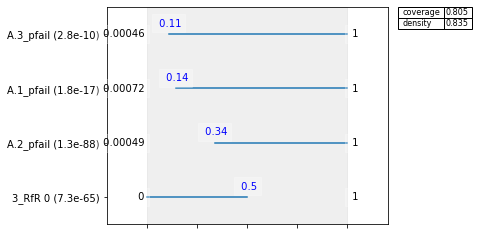

In [32]:
box.inspect(14)
box.inspect(14, style='graph')
plt.savefig('restricted dimensions.png')
plt.show()

/Users/josefiendewind/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


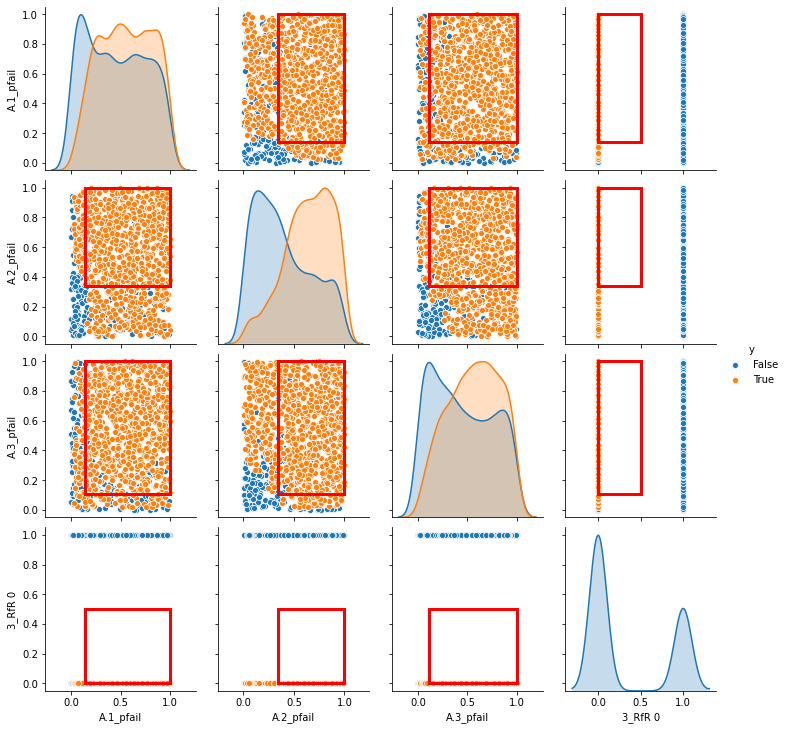

In [33]:
box.show_pairs_scatter(14)
plt.savefig('PRIM scatter plot.png')
plt.show()